# Tensorflow neural network regression example

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Generate artificial dataset

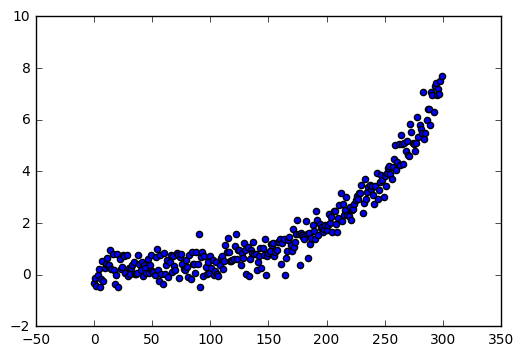

In [38]:
xdata = np.linspace(-1, 1, 300)[:, np.newaxis]

noise = np.random.normal(0, 0.4, xdata.shape)
#ydata = np.square(xdata) + 2 + noise #For parabolic distribution
ydata = np.exp(2*xdata) + noise
plt.scatter(range(300), ydata)
plt.show()

## Define a function for create layer of neurons

In [30]:
def add_layer(inputs, in_size, out_size, act_func=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size])+ 0.1)
    Func = tf.add(tf.matmul(inputs, weights), biases)
    if act_func is None:
        outputs = Func
    else:
        outputs = act_func(Func)
    return outputs

## Set placeholders

In [31]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

## Add hidden layer

In [32]:
l1 = add_layer(X, 1, 10, act_func=tf.nn.relu)

## Add output layer

In [33]:
pred = add_layer(l1, 10, 1, act_func=None)

## Set cost function and optimizer

In [34]:
cost = tf.reduce_mean(tf.reduce_sum(tf.square(Y-pred), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

## Initialize the process

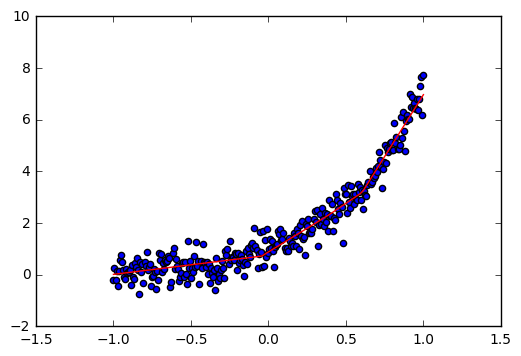

In [35]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(500):
    sess.run(optimizer, feed_dict={X:xdata, Y:ydata})
    #if i%50 == 0:
        #print(sess.run(cost, feed_dict={X:xdata, Y:ydata}))
        
pred_val = sess.run(pred, feed_dict={X: xdata})
plt.scatter(xdata, ydata)
plt.plot(xdata, pred_val, color='red')
plt.show()